# AlphaFold 3 PG fragments experimentation

Playing around with providing PG fragments as ligands to AF3.

In [52]:
import json
import os
from pathlib import Path
import random

from Bio import SeqIO
from rdkit import Chem
from rdkit.Chem.rdmolfiles import MolFromPDBFile
from rdkit.Chem.AllChem import Compute2DCoords
from rdkit.Chem import Draw
from IPython.display import display

cwd = os.getcwd()
if cwd.endswith('notebook'):
    os.chdir('..')
    cwd = os.getcwd()

In [6]:
data_folder = Path('./data/')
assert data_folder.is_dir()

## Load & display PG fragment

PG fragment extracted from [7Q4T](https://www.rcsb.org/structure/7Q4T) – "Structure of the Pseudomonas aeruginosa bacteriophage JG004 endolysin Pae87 bound to a peptidoglycan fragment"

It is made of two glycans, GlcNAC and MurNAC, and one peptide stem from the cell wall of _P. aeruginosa_.

In [43]:
pdb_file = data_folder / 'AF3' / '7q4t_PG_fragment.pdb'
mol = MolFromPDBFile(pdb_file.resolve().as_posix())
Compute2DCoords(mol)
smiles = Chem.MolToSmiles(mol)
smiles

'CC(O)N[C@@H]1[C@@H](O[C@H](C)C(O)N[C@@H](C)C(=O)N[C@H](CCC(O)O)C(O)O)[C@H](O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2NC(C)O)[C@@H](CO)O[C@@H]1O'

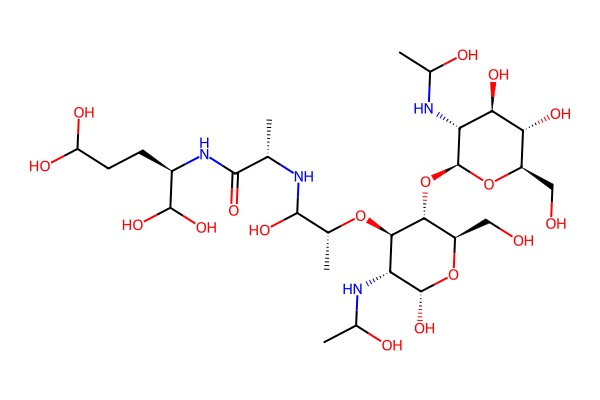

In [44]:
img = Draw.MolToImage(mol, size=(600, 400), dpi=300)
display(img)

## Load deacetylated version

In [45]:
pdb_file_deac = data_folder / 'AF3' / '7q4t_PG_fragment_deacetylated.pdb'
mol_deac = MolFromPDBFile(pdb_file_deac.resolve().as_posix())
Compute2DCoords(mol_deac)
smiles_deac = Chem.MolToSmiles(mol_deac)
smiles_deac

'C[C@H](NC(O)[C@@H](C)O[C@@H]1[C@@H]([NH3+])[C@@H](O)O[C@H](CO)[C@H]1O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1[NH3+])C(=O)N[C@H](CCC(O)O)C(O)O'

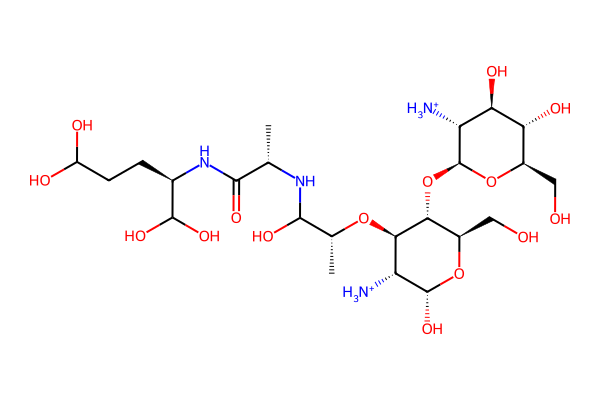

In [46]:
img_deac = Draw.MolToImage(mol_deac, size=(600, 400), dpi=300)
display(img_deac)

## Make AF compatible JSON files

Spec: https://github.com/google-deepmind/alphafold3/blob/main/docs/input.md

We'll load the sequence form the Human Lysozyme protein ([P61626](https://www.uniprot.org/uniprotkb/P61626/entry)).

In [55]:
def gen_model_seeds(n):
    return [int(random.uniform(1, 100)) for _ in range(n)]

In [56]:
seq_record = list(SeqIO.parse(data_folder / 'AF3' / 'Human_Lysozyme_P61626.fasta', 'fasta'))[0]

lysozyme_sequence = {
    'protein': {
        'id': 'A',
        'sequence': str(seq_record.seq).upper()
    },
}

In [57]:
pg_acetylated_sequence = {
    'ligand': {
        'id': 'B',
        'smiles': smiles,
    }
}
pg_deacetylated_sequence = {
    'ligand': {
        'id': 'B',
        'smiles': smiles_deac,
    }
}

In [ ]:
data_acetylated = {
    'name': 'LYZ_PG_acetylated',
    'sequences': [
        lysozyme_sequence,
        pg_acetylated_sequence,
    ],
    'modelSeeds': gen_model_seeds(3),
    'dialect': 'alphafold3',
    'version': 1,
}
data_deacetylated = {
    'name': 'LYZ_PG_deacetylated',
    'sequences': [
        lysozyme_sequence,
        pg_deacetylated_sequence,
    ],
    'modelSeeds': gen_model_seeds(3),
    'dialect': 'alphafold3',
    'version': 1,
}

In [59]:
with (data_folder / 'AF3' / 'LYZ_PG_acetylated.json').open('w') as f_out:
    json.dump(
        data_acetylated, 
        f_out,
        indent=True,
    )
with (data_folder / 'AF3' / 'LYZ_PG_deacetylated.json').open('w') as f_out:
    json.dump(
        data_deacetylated, 
        f_out,
        indent=True,
    )